In [1]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd

In [ ]:
# 상태코드 406 -> 서버가 응답을 생성할 수 없음 -> header로 접근

In [ ]:
# referer로도 요청할 수 있음

In [3]:
headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36",
}

url = "https://www.melon.com/chart/index.htm"
res = requests.get(url, headers=headers)
res

<Response [200]>

In [5]:
html = res.text
print(repr(html[:100]))
soup = BeautifulSoup(html, "html.parser")

'<!DOCTYPE html>\r\n<html lang="ko">\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n<head>\r\n\t\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t'


In [11]:
# soup.select(".service_list_song tbody tr")

#wrap_tag_list = soup.select(".lst50, .lst100")

wrap_tag_list = soup.select(".lst50, .lst100")
len(wrap_tag_list)

100

In [24]:
# 내 코드

song_list = []

for wrap_tag in wrap_tag_list :

    song_no = wrap_tag["data-song-no"]

    #wrap_tag.select_one("[href^=playSong]") # href.startswith("playSong")의미

    #wrap_tag.select_one("[href$=playSong]") # href.endswith("playSong")의미

    song_title = wrap_tag.select_one("[href*=playSong]").text # "playSong" in href 의 의미

    artist_name = wrap_tag.select_one("[href*=goArtistDetail]").text

    album_name = wrap_tag.select_one("[href*=goAlbumDetail]")["title"]

    cover_image_url = wrap_tag.select_one("[onerror*=defaultAlbumImg]")["src"]
    
    song_list.append(
    {
        '곡일련번호' : song_no,
        '앨범명' : album_name,
        "곡명" : song_title,
        "가수명" : artist_name,
        "커버이미지_주소" : cover_image_url,
    })

len(song_list)

100

In [ ]:
# 교수님 코드
song_list = []

for wrap_tag in wrap_tag_list:
    song_no = wrap_tag["data-song-no"]

    # wrap_tag.select_one("[href^=playSong]")  # href.startswith("playSong")의 의미
    # wrap_tag.select_one("[href$=playSong]")  # href.endswith("playSong")의 의미
    song_title = wrap_tag.select_one("[href*=playSong]").text  # "playSong" in href 의 의미
    artist_name = wrap_tag.select_one("[href*=goArtistDetail]").text
    album_name = wrap_tag.select_one("[href*=goAlbumDetail]")["title"]
    
    cover_image_url = wrap_tag.select_one("[onerror*=defaultAlbumImg]")["src"]

    song_list.append({
        "곡일련번호": song_no,
        "앨범명": album_name,
        "곡명": song_title,
        "가수명": artist_name,
        "커버이미지_주소": cover_image_url,
    })
    
    # print(song_no, album_name, song_title, artist_name, cover_image_url)

len(song_list)

In [26]:
df = pd.DataFrame(song_list).set_index("곡일련번호")

df["순위"] = range(1, df.shape[0]+1)

print(df.shape)

df.head()

(100, 5)


,앨범명,곡명,가수명,커버이미지_주소,순위
곡일련번호,,,,,
36599950,NewJeans 2nd EP 'Get Up',Super Shy,NewJeans,https://cdnimg.melon.co.kr/cm2/album/images/11...,1
36617841,Seven (feat. Latto) - Clean Ver.,Seven (feat. Latto) - Clean Ver.,정국,https://cdnimg.melon.co.kr/cm2/album/images/11...,2
36635522,NewJeans 2nd EP 'Get Up',ETA,NewJeans,https://cdnimg.melon.co.kr/cm2/album/images/11...,3
36430773,I feel,퀸카 (Queencard),(여자)아이들,https://cdnimg.melon.co.kr/cm2/album/images/11...,4
36382580,1집 Alone,헤어지자 말해요,박재정,https://cdnimg.melon.co.kr/cm2/album/images/11...,5


In [28]:
url = "https://www.melon.com/commonlike/getSongLike.json"

params = {
    "contsIds" : "36599950,36617841",
}

res = requests.get(url, params = params, headers=headers)
res

<Response [200]>

In [33]:
likes_dict = {}

for song in res.json()['contsLike'] :
    print(song["CONTSID"], song["SUMMCNT"])
    likes_dict[song["CONTSID"]] = song["SUMMCNT"]
    
likes_dict

36599950 102867
36617841 107071


{36599950: 102867, 36617841: 107071}

In [35]:
# dict comprehension
{ 
    song["CONTSID"] : song["SUMMCNT"]
    for song in res.json()['contsLike'] 
}

{36599950: 102867, 36617841: 107071}

In [36]:
numbers = [1, 2, 3, 4, 5]

[number ** 2 for number in numbers] # list comprehension

[number ** 2 
 for number in numbers 
 if number % 2 == 0] # list comprehension

[4, 16]

In [38]:
{number % 3 for number in numbers} # set comprehension -> 집합은 값만 나열

{0, 1, 2}

In [39]:
{number : number % 3 for number in numbers} # dict comprehension -> value와 key를 함께

{1: 1, 2: 2, 3: 0, 4: 1, 5: 2}

In [40]:
(number ** 2 for number in numbers) # tuple comprehension은 없다 !!

<generator object <genexpr> at 0x000001977F21A200>

In [ ]:
# 좋아요 요청

In [45]:
conts_ids = ",".join(df.index)

In [46]:
url = "https://www.melon.com/commonlike/getSongLike.json"

params = {
    "contsIds" : conts_ids,
}

res = requests.get(url, params = params, headers=headers)
res

<Response [200]>

In [50]:
res.json()

{'contsLike': [{'CONTSID': 36599950, 'LIKEYN': 'N', 'SUMMCNT': 102895},
  {'CONTSID': 36617841, 'LIKEYN': 'N', 'SUMMCNT': 107102},
  {'CONTSID': 36635522, 'LIKEYN': 'N', 'SUMMCNT': 43352},
  {'CONTSID': 36430773, 'LIKEYN': 'N', 'SUMMCNT': 122594},
  {'CONTSID': 36382580, 'LIKEYN': 'N', 'SUMMCNT': 88980},
  {'CONTSID': 36356993, 'LIKEYN': 'N', 'SUMMCNT': 186681},
  {'CONTSID': 36411344, 'LIKEYN': 'N', 'SUMMCNT': 93750},
  {'CONTSID': 36416114, 'LIKEYN': 'N', 'SUMMCNT': 113634},
  {'CONTSID': 36490426, 'LIKEYN': 'N', 'SUMMCNT': 96888},
  {'CONTSID': 36599949, 'LIKEYN': 'N', 'SUMMCNT': 50731},
  {'CONTSID': 34061322, 'LIKEYN': 'N', 'SUMMCNT': 200662},
  {'CONTSID': 36411342, 'LIKEYN': 'N', 'SUMMCNT': 111230},
  {'CONTSID': 36502910, 'LIKEYN': 'N', 'SUMMCNT': 45562},
  {'CONTSID': 36318125, 'LIKEYN': 'N', 'SUMMCNT': 144968},
  {'CONTSID': 35454426, 'LIKEYN': 'N', 'SUMMCNT': 274155},
  {'CONTSID': 34908740, 'LIKEYN': 'N', 'SUMMCNT': 96574},
  {'CONTSID': 35008524, 'LIKEYN': 'N', 'SUMMCNT': 

In [53]:
# dict comprehension
likes_dict = { 
    str(song["CONTSID"]) : int(song["SUMMCNT"])
    for song in res.json()['contsLike'] 
}

len(likes_dict)

100

In [54]:
df["좋아요수"] = likes_dict
print(df.shape)
df.head()

(100, 6)


,앨범명,곡명,가수명,커버이미지_주소,순위,좋아요수
곡일련번호,,,,,,
36599950,NewJeans 2nd EP 'Get Up',Super Shy,NewJeans,https://cdnimg.melon.co.kr/cm2/album/images/11...,1,102895
36617841,Seven (feat. Latto) - Clean Ver.,Seven (feat. Latto) - Clean Ver.,정국,https://cdnimg.melon.co.kr/cm2/album/images/11...,2,107102
36635522,NewJeans 2nd EP 'Get Up',ETA,NewJeans,https://cdnimg.melon.co.kr/cm2/album/images/11...,3,43352
36430773,I feel,퀸카 (Queencard),(여자)아이들,https://cdnimg.melon.co.kr/cm2/album/images/11...,4,122594
36382580,1집 Alone,헤어지자 말해요,박재정,https://cdnimg.melon.co.kr/cm2/album/images/11...,5,88980


In [59]:
song_count_series = df.groupby("가수명").size().sort_values(ascending=False)
song_count_series

가수명
임영웅                     15
NCT DREAM               11
NewJeans                10
방탄소년단                    6
IVE (아이브)                4
Charlie Puth             4
(여자)아이들                  4
정국                       3
LE SSERAFIM (르세라핌)       3
이무진                      1
#안녕                      1
윤하 (YOUNHA)              1
우디 (Woody)               1
오마이걸 (OH MY GIRL)        1
세븐틴 (SEVENTEEN)          1
성시경                      1
이채연                      1
제이세라                     1
임재현                      1
임한별                      1
지민                       1
지수 (JISOO)               1
지아                       1
케이시 (Kassy)              1
탑현                       1
테이                       1
부석순 (SEVENTEEN)          1
던 (DAWN)                 1
박재정                      1
The Kid LAROI            1
Agust D                  1
DK(디셈버)                  1
EXO                      1
FIFTY FIFTY              1
H1-KEY (하이키)             1
Lauv                     1
Paul Blanco             

In [61]:
import matplotlib.pyplot as plt # 정적 이미지 생성
import platform

if platform.system() == "Darwin":
    plt.rc("font", family="AppleGothic")  # macOS 시스템 기본 폰트

elif platform.system() == "Windows":
    plt.rc("font", family="Malgun Gothic")  # Windows 시스템 기본 폰트

<Axes: xlabel='가수명'>

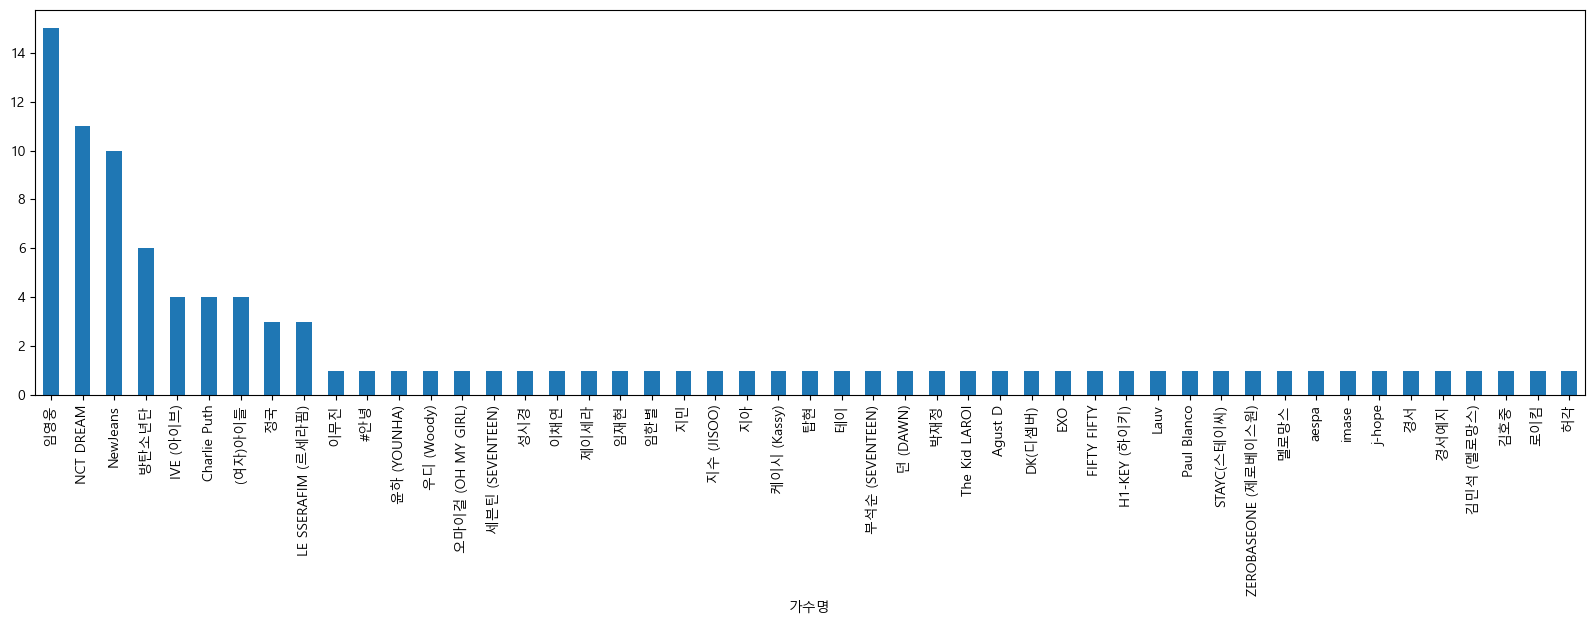

In [67]:
song_count_series.plot(kind="bar", figsize=(20,5))


In [75]:
mask = song_count_series > 1  # boolean mask
chart_series = song_count_series[mask] # 필터링 해서 보여줌
chart_series

가수명
임영웅                   15
NCT DREAM             11
NewJeans              10
방탄소년단                  6
IVE (아이브)              4
Charlie Puth           4
(여자)아이들                4
정국                     3
LE SSERAFIM (르세라핌)     3
dtype: int64

In [79]:
mask = song_count_series == 1
chart_series["Others"] = song_count_series[mask].sum() # count() 도 가능
chart_series

가수명
임영웅                   15
NCT DREAM             11
NewJeans              10
방탄소년단                  6
IVE (아이브)              4
Charlie Puth           4
(여자)아이들                4
정국                     3
LE SSERAFIM (르세라핌)     3
Others                40
dtype: int64

<Axes: >

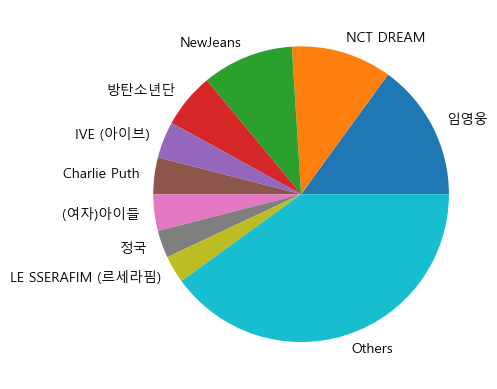

In [82]:
chart_series.plot(kind="pie")

In [84]:
# 엑셀에서 열어볼 것이다. => utf-8-sig
# ELSE = > utf8
df.to_csv("melon_TOP100-utf-8-sig.csv", encoding="utf-8-sig") #utf8, utf-8-sig